# Inference from Scientific Data, 2020 - Worksheet 3 - Question 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
from scipy import integrate
from scipy.stats import norm
from scipy import stats
from scipy.stats import kstwo

In [12]:
Ls = 1.4*10**10
alpha = -0.7

The first question asks only about the galaxies which appear in the survey, (rather than the complete set in nature). Therefore the whole probablilty space for $L$ spans $10^9<L <\infty$. For part 1 the Schechter function will be normalised over this reduced domain. 

For parts 2 and 3, the whole distribution will be considered, i.e the luminosities of galaxies found in nature (rather than just on the survey). Consequently, the Schechter function will be used again but normalised over $0< L <\infty$.

(In practice $\infty \simeq 10^{12}$ is a sufficiently large domain, and for part 2 and 3, the normalisation will begin at 1 to avoid 
0 division error.

In [13]:
l = 10**9
u = 10**12

s1 = int((u-l)/(10**7))
s2 = int((u)/(10**7))

Ldom1 = np.linspace(l, u, s1)
Ldom2 = np.linspace(1, u, s2)

The Schechter function is given by

\begin{equation*}
P(L)dL \propto \bigg(\frac{L}{L_\star}\bigg)^\alpha exp\bigg(-\frac{L}{L_\star}\bigg)\frac{dL}{L_\star}
\end{equation*}

where $L_\star = 1.4\times10^{10} L_\odot$, 
$\alpha = -0.7$ and 
$L_\odot$ has been set to 1

In [14]:
def func(L):
    return (L/Ls)**alpha*np.exp(-L/Ls)/Ls

In [15]:
z1 = np.sum(func(Ldom1))
z2 = np.sum(func(Ldom2))

PL1 = func(Ldom1)/z1
PL2 = func(Ldom2)/z2

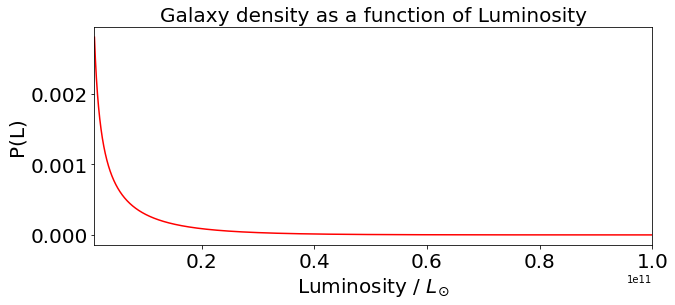

In [16]:
fig, axs = plt.subplots(1, 1)
axs.set_title('Galaxy density as a function of Luminosity', fontsize = 20)
axs.plot(Ldom1, PL1, color = "red")
axs.set_ylabel("P(L)", fontsize = 20)
axs.set_xlim(10**9, 10**11)
axs.set_xlabel('Luminosity / $L_{\odot}$', fontsize = 20)
axs.tick_params(axis='both', which='major', labelsize=20)
fig.set_figheight(4)
fig.set_figwidth(10)

### Part 1

The expectation value of the luminosity of galaxies on the survey:

\begin{equation*}
\langle L \rangle = \int_{L_{min}}^{\infty} L' P(L') dL'
\end{equation*}

where $L_{min} = 10^9$ corresponds to the sensitivity of the instrument. Galaxies darker than this wont be observed. The upper
bound can be set to $10^{12}$ without effecting accuracy.

This can be found numerically using the trapezium rule

In [17]:
L_exp = np.sum(Ldom1*PL1)
L_exp*10**-9

8.112101067442985

### $\Rightarrow \langle L \rangle_{survey} = 8.11 \times 10^9 L_\odot$

Note that this is the expected luminosity of galaxies whice were found on the survey only. The expected luminosty of galaxies found in nature will be smaller than this.

In [18]:
L_exp = np.sum(Ldom2*PL2)
L_exp*10**-6

1.3894490454187944

### $\Rightarrow \langle L \rangle_{nature} = 1.39 \times 10^6 L_\odot$

### Part 2

The Cumulative distribution function is defined as

\begin{equation*}
C(L) = \int_{L_{min}}^{L} P(L') dL'
\end{equation*}

This question asks whether the the galaxies fit in with nature, therefore the full domain over L will be used, $0<L<10^{12}$.

In [32]:
PL3 = func(Ldom2)/z2
C = PL3
i=1
while i<len(PL2):
    C[i] = (C[i-1]+PL2[i])
    i+=1

C[0]

0.9997041348387122

In [20]:
A = [1.39, 1.40, 1.29, 5.95, 2.97, 1.63, 1.17, 2.06, 4.69, 2.48]
G = []
for i in A:
    G.append(i*10**9)

In [21]:
So_points = np.sort(G)
So_values = np.arange(1, len(G)+1)/len(G)

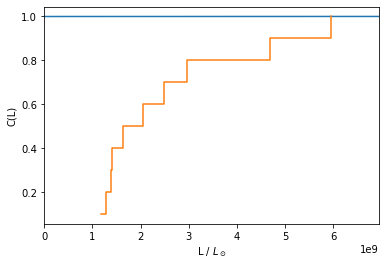

In [22]:
plt.plot(Ldom2, C)
plt.step(So_points, So_values, where="post")
plt.xlabel("L / $L_\odot$"); plt.ylabel("C(L)")
plt.xlim(0, So_points[9]+10**9)
plt.show()

The expected result suggests that the galaxies in nature have L = 0. This is expected because $P(L \rightarrow 0) \rightarrow \infty$, consequently, $C[0]\simeq 1$ 

### Part 3

Using the KS test, we can calculate D:

\begin{equation*}
D = max|S_e(L_i) - S_0(L_i)|
\end{equation*}

where $S_e(L)$ is the expected cumulitive distribution, (blue plot). $S_0(L)$ is the observed cumulative distribution in $G$, (orange plot).

The null hypothesis $H_0$ is that the data in $G$ does follow the distribution

In [23]:
pl = func(So_points)/z2 #Probability of obtaining each value of G
N = len(G)
F = np.empty(N)

i=0
while i<N:
    K = 0
    j = 0
    while pl[i] < PL2[j]:   #since PL decreases with increasing L
        K+=PL2[j]
        j+=1
    F[i] = K
    i+=1

In [24]:
D = abs(So_values-F).max()
D

0.8998407319179244

### $D = 0.9$

$D$ follows a Kolmogorov distribution, therefore we can find the probability of obtaining a value of $D$ at least as extreme as $D \sim 0.9$ to assess whether $G$ follows $P(L)$.

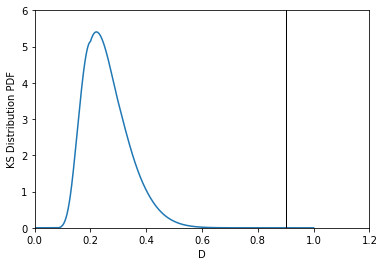

In [25]:
grid = np.linspace(0, 1, 1000)
plt.plot(grid, kstwo(N).pdf(grid))
plt.xlabel("D"); plt.ylabel("KS Distribution PDF");
plt.axvline(D, c="k", lw=1)
plt.xlim(0, 1.2); plt.ylim(0, 6);
plt.show()

In [26]:
P = 1-kstwo(N).cdf(D)
P

2.0320833904463598e-10

### p-value $\sim 0\%$

Therefore the probability of obtaining a value of D at least this extreme is 0%. Therefore it is unlikely that $G$ follows the distributution given at the 90% level.

In [27]:
stats.ks_2samp(func(Ldom2)/z2, G)

KstestResult(statistic=1.0, pvalue=0.0)